# Lab2 - MLP 
### Jan 29th - 2022 - Data Mining

Please read this article to gain more information about the relationships between AI, Machine Learning, Neural Networks, Deep Learning

https://www.ibm.com/cloud/blog/ai-vs-machine-learning-vs-deep-learning-vs-neural-networks

# Linear Classifier
Lets start with a simple linear classifier Perceptron.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

## Generating Some Linear Separable Data


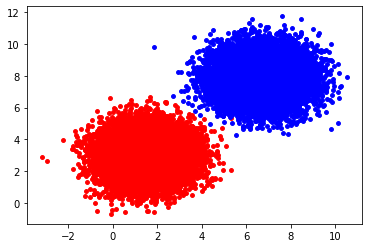

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
numSamples = 30000
samples,labels = make_blobs(n_samples=numSamples, 
                             centers=([1.5, 3], [6.7, 7.9]), 
                             random_state=0)
colours = ('red', 'blue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=15)

# Python Vectorization
Take a look at the following cool posts to get more information about vectorization

http://geeksforgeeks.org/vectorization-in-python/
https://www.tutorialspoint.com/vectorization-in-python

In [2]:
%%time
n_class = 1
labels==n_class;

Wall time: 0 ns


array([False, False,  True, ...,  True,  True, False])

In [3]:
%%time
idx = np.empty(len(labels), dtype=bool)
for i in range(1,len(labels)):
    if (labels[i]==1):
        idx[i] = 'True'
# print(idx)

Wall time: 7 ms


# Perceptron
Learn it by Perceptron

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html


[11.18369735 12.81994437]
0.9995833333333334
0.9998333333333334


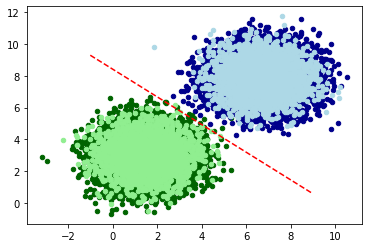

In [4]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
trainData, testData, trainLabels,testLabels = train_test_split(samples , labels , test_size = 0.2, random_state=0)
clf = Perceptron(tol=1e-1, max_iter = 3000, early_stopping= True)
clf.fit(trainData,trainLabels)
clf.predict(testData)
colours = ('darkgreen', 'darkblue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(trainData[trainLabels==n_class][:, 0], trainData[trainLabels==n_class][:, 1],c=colours[n_class],s=20)
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(testData[testLabels==n_class][:, 0], testData[testLabels==n_class][:, 1], 
               c=colours[n_class], s=20, label=str(n_class))
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(-1,9)
# print(xx)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, '--', color='red')
print(clf.score(trainData,trainLabels))
print(clf.score(testData,testLabels))

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

# Generating non-linearly separable data

0.9166666666666666
[ 0.63738098 -5.10594151]


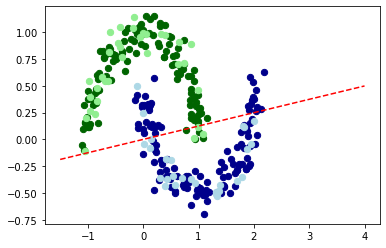

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons,make_circles
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

samples, labels = make_moons(n_samples=300, noise=0.1)
# samples, labels = make_circles(n_samples=300, noise=0.05)
trainData, testData, trainLabels,testLabels = train_test_split(samples , labels , test_size = 0.2)
clf = Perceptron(tol=1e-3)
clf.fit(trainData,trainLabels)
clf.predict(testData)
print(clf.score(testData,testLabels))
# scatter plot, dots colored by class value

colours = ('darkgreen', 'darkblue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(trainData[trainLabels==n_class][:, 0], trainData[trainLabels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(testData[testLabels==n_class][:, 0], testData[testLabels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
# fig, ax = plt.subplots()
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(-1.5, 4)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, '--', color='red')

# Multi-layer non-linear neural network

Code is based on: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

A notebook about Stochastic Gradient Descent (SGD): 
https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Classification/Stochastic_grad_descent.ipynb

1.0
(330,)
(15, 22)


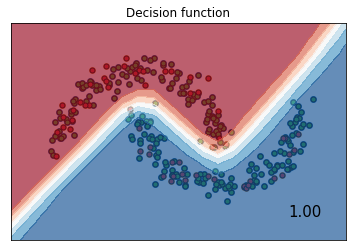

In [6]:
#  solver: lbfgs, sgd(Stochiastic Gradient Descent) and Adam 
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(hidden_layer_sizes=(40,10), max_iter=2000, alpha=0.1,
                    solver='adam',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp.fit(trainData, trainLabels);
mlp.predict(testData)
print(mlp.score(testData,testLabels))

h=0.2 #step-size
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
x_min, x_max = samples[:, 0].min() - .5, samples[:, 0].max() + .5
y_min, y_max = samples[:, 1].min() - .5, samples[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.ravel().shape)
print(yy.shape)
fig, ax = plt.subplots()
ax.scatter(trainData[:, 0], trainData[:, 1])
    # and testing points
ax.scatter(testData[:, 0], testData[:, 1], cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
if hasattr(mlp, "decision_function"):
    Z = mlp.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
# ax.contourf(xx, yy, Z, cmap=cm, alpha=.001)

        # Plot also the training points
ax.scatter(trainData[:, 0], trainData[:, 1],edgecolors='black', s=25)
ax.scatter(testData[:, 0], testData[:, 1], edgecolors='black', s=25)
name="Decision function"
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(name)
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % mlp.score(testData,testLabels)).lstrip('0'),size=15, horizontalalignment='right')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.67)
plt.show()

Hand-Written digits:
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits




<Figure size 432x288 with 0 Axes>

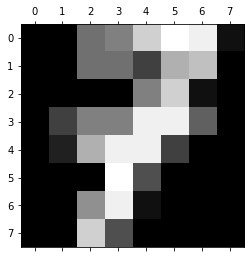

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np

images = load_digits()
plt.gray()
plt.matshow(images.images[7])
plt.show()


# Experiment

Running experiment on number of neurons in the hidden layer and the value of regularization($\alpha$).

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np

X_digits, y_digits = load_digits(return_X_y=True)
X_scaled = preprocessing.scale(X_digits)
trainData,testData,trainLabel,testLabel =train_test_split(X_scaled,y_digits,test_size=0.2)

# ======== Running Experiments on number of neurons in the hidden layer

clf_1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_1.fit(trainData,trainLabel)
print(clf_1.score(trainData,trainLabel))
print("Accuracy of using 3 neurons in the hidden layer:%.4f"%clf_1.score(testData,testLabel))

clf_2 = MLPClassifier(hidden_layer_sizes=(7), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_2.fit(trainData,trainLabel)
print(clf_2.score(trainData,trainLabel))
print("Accuracy of using 7 neurons in the hidden layer:%.4f"%clf_2.score(testData,testLabel))


clf_3 = MLPClassifier(hidden_layer_sizes=(13), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_3.fit(trainData,trainLabel)
print(clf_3.score(trainData,trainLabel))
print("Accuracy of using 13 neurons in the hidden layer:%.4f"%clf_3.score(testData,testLabel))

clf_4 = MLPClassifier(hidden_layer_sizes=(21), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_4.fit(trainData,trainLabel)
print(clf_4.score(trainData,trainLabel))
print("Accuracy of using 21 neurons in the hidden layer:%.4f"%clf_4.score(testData,testLabel))

# ============================== Running Experiments on alpha parameter
clf_5 = MLPClassifier(hidden_layer_sizes=(4),alpha=1,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_5.fit(trainData,trainLabel)
print(clf_5.score(trainData,trainLabel))
print("Accuracy of using alpha=1:%.4f"%clf_5.score(testData,testLabel))

clf_6 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-1,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_6.fit(trainData,trainLabel)
print(clf_6.score(trainData,trainLabel))
print("Accuracy of using alpha=0.1:%.4f"%clf_6.score(testData,testLabel))

clf_7 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-2,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_7.fit(trainData,trainLabel)
print(clf_7.score(trainData,trainLabel))
print("Accuracy of using alpha=0.01:%.4f"%clf_7.score(testData,testLabel))

clf_8 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-3,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_8.fit(trainData,trainLabel)
print(clf_8.score(trainData,trainLabel))
print("Accuracy of using alpha=0.001:%.4f"%clf_8.score(testData,testLabel))


# ============== Plotting in the next cell

0.8907446068197634
Accuracy of using 3 neurons in the hidden layer:0.8194
0.9958246346555324
Accuracy of using 7 neurons in the hidden layer:0.9500
1.0
Accuracy of using 13 neurons in the hidden layer:0.9694
0.9993041057759221
Accuracy of using 21 neurons in the hidden layer:0.9611
0.9554627696590118
Accuracy of using alpha=1:0.9111
0.9631176061238692
Accuracy of using alpha=0.1:0.8972
0.9519832985386222
Accuracy of using alpha=0.01:0.8556
0.9714683368128044
Accuracy of using alpha=0.001:0.8417


# Visualization
Ploting results from above cell. Please, look at the following link to get more infoamtion:
https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

https://matplotlib.org/tutorials/introductory/pyplot.html


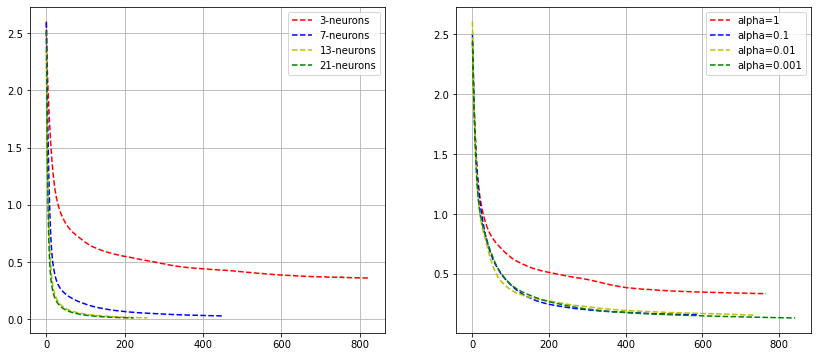

In [9]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].plot(clf_1.loss_curve_,'r--', label='3-neurons')
axs[0].plot(clf_2.loss_curve_,'b--',label='7-neurons')
axs[0].plot(clf_3.loss_curve_,'y--',label='13-neurons')
axs[0].plot(clf_4.loss_curve_,'g--',label='21-neurons')
axs[0].grid('True')
axs[0].legend()

axs[1].plot(clf_5.loss_curve_, 'r--' , label='alpha=1')
axs[1].plot(clf_6.loss_curve_, 'b--' , label='alpha=0.1')
axs[1].plot(clf_7.loss_curve_, 'y--' , label='alpha=0.01')
axs[1].plot(clf_8.loss_curve_, 'g--' , label='alpha=0.001')
axs[1].grid('True')
axs[1].legend()

# GridSearch
Finding the best hyperparameter using built-in GridSearch function inside the sklearn package
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

A useful example: 
https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv#L71


In [10]:
%%time
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np
parameters = {'solver': ['lbfgs','sgd'], 'max_iter': [200,300,120],
              'alpha': 10.0 ** -np.arange(0, 3), 'hidden_layer_sizes':np.arange(10, 15)} 

clf = GridSearchCV(MLPClassifier(), parameters)
clf.fit(trainData,trainLabel)
print(clf.best_params_)
print(clf.best_score_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

KeyboardInterrupt: 

## Approximate Function With Neural Network

Neural networks can also be used for approximating a function.

Lets start with a simple fucntion as following:
$$y(x) = \sin(2\pi x ) + \sin(5\pi x)$$
with x = -1:0.002:1


In [11]:
import numpy as np

def y(x):
    return (np.sin(2*np.pi*x) + np.sin(5*np.pi*x))


with x = -1:0.002:1


In [12]:
x_vals = np.arange(-1,1,0.002)
y_vals = y(x_vals)

In [13]:
# y_max = y_vals.max()
# y_vals /= y_max

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)

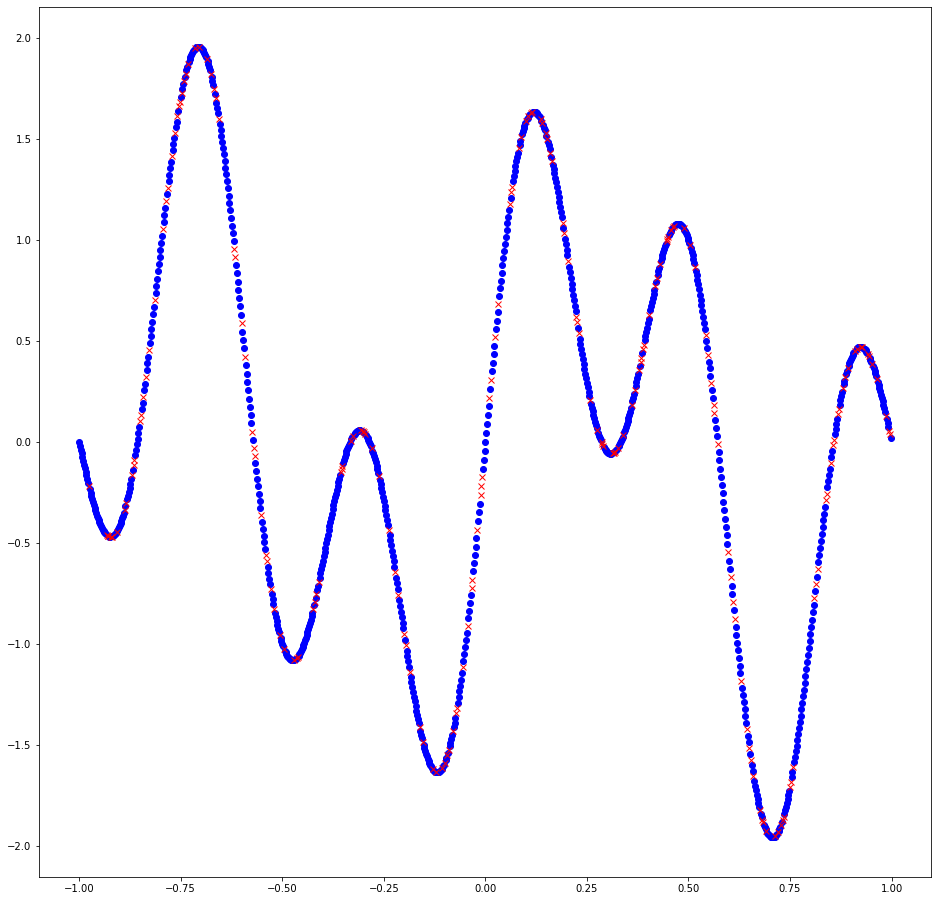

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize= (16,16))
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'rx')
plt.show()

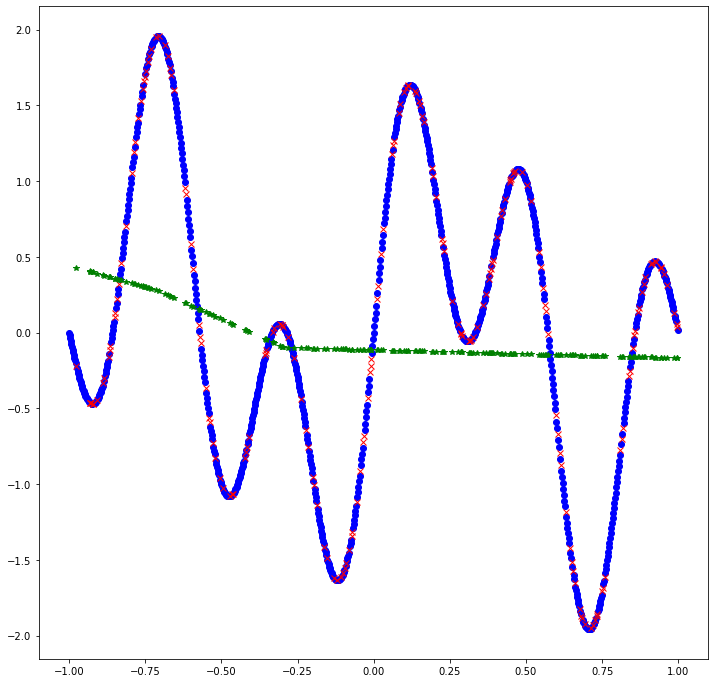

In [16]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=[10],
    max_iter=1000,
)

mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)
plt.figure(figsize= (12,12))
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'rx')
# plt.show()
plt.plot(x_test, predictions, 'g*')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)


0.983236419028604



## Use Grid Search please to find the best combination of number of hidden layers 